In [18]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
from model.SIR.SIR import SIR
import model.utils as utils

In [19]:
sh_data = utils.read_data("../../dataset/data_xyz/provinceData/上海.json")
sh_data = sh_data.loc[:, ["dateId", "currentConfirmedCount", "deadCount", "curedCount"]]
sh_data

,dateId,currentConfirmedCount,deadCount,curedCount
0,20200120,1,0,0
1,20200121,9,0,0
2,20200122,16,0,0
3,20200123,20,0,0
4,20200124,32,1,0
...,...,...,...,...
826,20220511,4787,572,56157
827,20220512,4589,574,56580
828,20220513,4061,575,57302
829,20220514,3933,578,57595


In [20]:
start_day = 775
end_day = sh_data.shape[0]
all_num, num, rate = utils.init_params("上海", sh_data, start_day)
all_num, num, rate

(1658059.6666666667,
 [1652993.6666666667, 447, 7, 4612],
 [0.9969446214139057,
  0.0002695922281847919,
  4.221802231081752e-06,
  0.0027815645556784345])

In [21]:
sir = SIR(rate[0], rate[1], rate[2], 1, 0.8295, 0.001)
res = sir.predict(np.arange(0, end_day-start_day, 1))

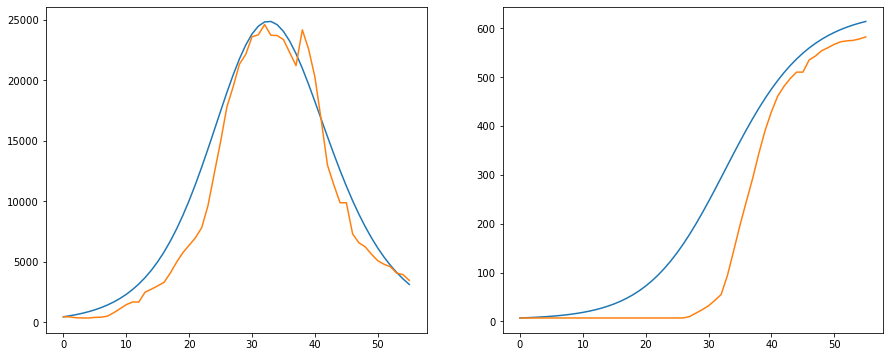

In [22]:
sh_confirm_eval = sh_data.loc[start_day:, "currentConfirmedCount"].reset_index(drop=True)
sh_dead_eval = sh_data.loc[start_day:, "deadCount"].reset_index(drop=True)
pred_confirm = res[:,1] * all_num
pred_dead = res[:,3] * all_num

plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.plot(pred_confirm)
plt.plot(sh_confirm_eval)

plt.subplot(1,2,2)
plt.plot(pred_dead)
plt.plot(sh_dead_eval)

plt.show()

In [23]:
error_confirm, _, rmse_confirm = utils.eval(sh_confirm_eval,pred_confirm)
error_dead, _, rmse_dead = utils.eval(sh_dead_eval,pred_dead)
print("Confirmed: error->%f, rmse->%f\nDead: error->%f, rmse->%f" % (error_confirm, rmse_confirm, error_dead, rmse_dead))

Confirmed: error->1523.361282, rmse->11399.791990
Dead: error->67.571494, rmse->505.658756


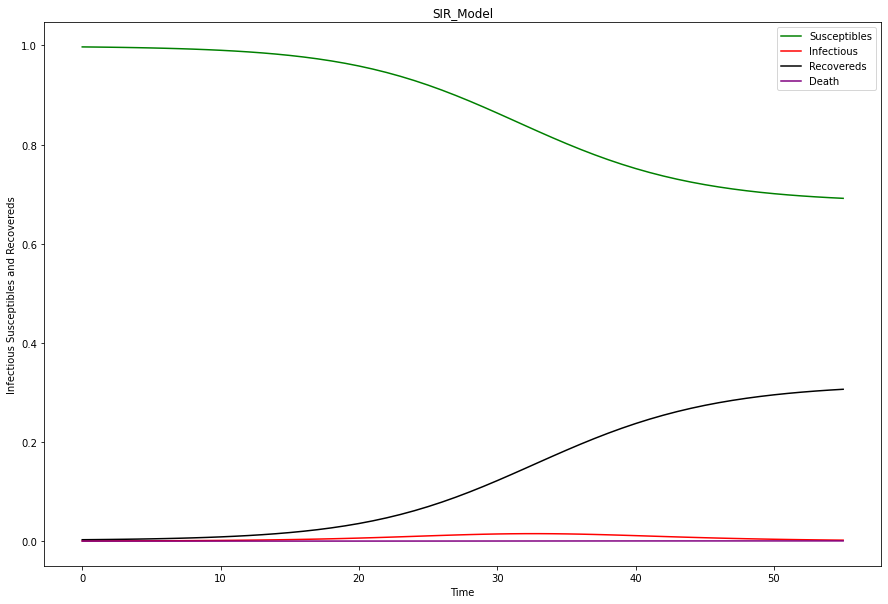

In [24]:
sir.show(res)

In [25]:
save_path = "../../dataset/data_predict/SIR/sh_predict.csv"
pred_data = pd.DataFrame(res[:,1:])
pred_data = pred_data.rename({0:"confirmedCount", 1:"curedCount", 2:"deadCount"},axis=1)
pred_data = pred_data * all_num

actual_data = sh_data.loc[start_day:,["currentConfirmedCount","deadCount"]].reset_index(drop=True)
actual_data = actual_data.rename({"currentConfirmedCount": "actualConfirmedCount", "deadCount": "actualDeadCount"}, axis=1)

save_data = pred_data.join(actual_data)
save_data.iloc[:,[0,2,3,4]].to_csv(save_path)

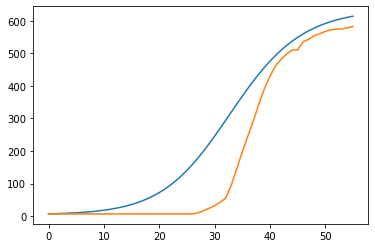

In [26]:
plt.plot(pred_dead)
plt.plot(sh_dead_eval)
plt.show()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

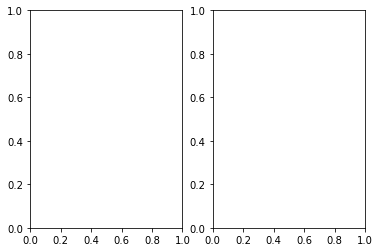

In [27]:
fig,axes = plt.subplots(1,2)
axes[0,0].set_title('first')
axes[0,1].set_title('last')
x = [1,2,3,4,5]
y = [x**2 for x in x]
axes[0,0].plot(x,y)
plt.show()